In [ ]:
%%bash
set -e

TOKEN="KGAT_05b677fddf87f21911fc28a7f29d394e"
URL="https://www.kaggle.com/api/v1/datasets/download/sripaadsrinivasan/fish-species-image-data"

curl -L \
  -H "Authorization: Bearer ${TOKEN}" \
  -o /content/fish-species-image-data.zip \
  "$URL"

unzip -oq /content/fish-species-image-data.zip -d /content/dataset



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1339M  100 1339M    0     0   216M      0  0:00:06  0:00:06 --:--:--  238M


In [ ]:
import os

BASE_PATH = "/content/dataset"
DATASET_DIR = os.path.join(BASE_PATH, os.listdir(BASE_PATH)[0])

print("Dataset dir:", DATASET_DIR)
print("İçindekiler:", os.listdir(DATASET_DIR))




Dataset dir: /content/dataset/Fish_Data
İçindekiler: ['WACV14.pdf', 'images', 'LicenceAndAuthors.pdf', 'final_all_index.txt']


In [ ]:

IMAGES_DIR = os.path.join(DATASET_DIR, "images")

classes = [
    d for d in os.listdir(IMAGES_DIR)
    if os.path.isdir(os.path.join(IMAGES_DIR, d)) and not d.startswith(".")
]

classes = sorted(classes)

# Boş sınıf var mı kontrol et
empty_classes = [
    d for d in classes
    if len(os.listdir(os.path.join(IMAGES_DIR, d))) == 0
]

print("Toplam sınıf (tür) sayısı:", len(classes))
print("İlk 20 sınıf:")
print(classes[:20])

if empty_classes:
    print("Boş sınıflar bulundu:", empty_classes)
else:
    print("Boş sınıf yok, dataset temiz.")

Toplam sınıf (tür) sayısı: 3
İlk 20 sınıf:
['cropped', 'numbered', 'raw_images']
Boş sınıf yok, dataset temiz.


In [ ]:
import os

BASE = "/content/dataset"

subdirs = [
    d for d in os.listdir(BASE)
    if os.path.isdir(os.path.join(BASE, d)) and not d.startswith(".")
]

assert len(subdirs) == 1, f"Beklenmeyen klasör yapısı: {subdirs}"

DATASET_DIR = os.path.join(BASE, subdirs[0])

for root, dirs, files in os.walk(DATASET_DIR):
    for f in files:
        if f.lower().endswith((".csv", ".txt", ".json")):
            print("Bulundu:", os.path.join(root, f))



Bulundu: /content/dataset/Fish_Data/final_all_index.txt


In [ ]:
index_file = os.path.join(DATASET_DIR, "final_all_index.txt")

with open(index_file, "r") as f:
    for i in range(20):
        line = f.readline()
        if not line:
            break
        print(line.strip())


1=A73EGS-P=controlled=A73EGS-P_1=1
1=A73EGS-P=sketches=A73EGS-P_2=2
1=A73EGS-P=controlled=A73EGS-P_3=3
1=A73EGS-P=controlled=A73EGS-P_4=4
1=A73EGS-P=controlled=A73EGS-P_5=5
1=A73EGS-P=controlled=A73EGS-P_6=6
1=A73EGS-P=controlled=A73EGS-P_7=7
2=acanthaluteres_brownii=insitu=acanthaluteres_brownii_1=8
2=acanthaluteres_brownii=insitu=acanthaluteres_brownii_2=9
2=acanthaluteres_brownii=insitu=acanthaluteres_brownii_3=10
2=acanthaluteres_brownii=insitu=acanthaluteres_brownii_4=11
3=acanthaluteres_spilomelanurus=controlled=acanthaluteres_spilomelanurus_1=12
3=acanthaluteres_spilomelanurus=insitu=acanthaluteres_spilomelanurus_2=13
3=acanthaluteres_spilomelanurus=insitu=acanthaluteres_spilomelanurus_3=14
4=acanthaluteres_vittiger=insitu=acanthaluteres_vittiger_1=15
4=acanthaluteres_vittiger=controlled=acanthaluteres_vittiger_2=16
4=acanthaluteres_vittiger=insitu=acanthaluteres_vittiger_3=17
4=acanthaluteres_vittiger=insitu=acanthaluteres_vittiger_4=18
4=acanthaluteres_vittiger=insitu=acanthal

In [ ]:
import pandas as pd

records = []

with open("/content/dataset/Fish_Data/final_all_index.txt", "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        parts = line.split("=")
        class_id = int(parts[0])
        species = parts[1]
        scene = parts[2]
        image_name = parts[3] + ".jpg"

        records.append({
            "class_id": class_id,
            "species": species,
            "scene": scene,
            "image_name": image_name
        })

df = pd.DataFrame(records)
df.head()

,class_id,species,scene,image_name
0,1,A73EGS-P,controlled,A73EGS-P_1.jpg
1,1,A73EGS-P,sketches,A73EGS-P_2.jpg
2,1,A73EGS-P,controlled,A73EGS-P_3.jpg
3,1,A73EGS-P,controlled,A73EGS-P_4.jpg
4,1,A73EGS-P,controlled,A73EGS-P_5.jpg


In [ ]:
print("Toplam örnek sayısı:", len(df))
print("Toplam tür sayısı:", df["species"].nunique())

df["species"].value_counts().describe()



Toplam örnek sayısı: 4411
Toplam tür sayısı: 483


,count
count,483.000000
mean,9.132505
std,4.994088
min,3.000000
25%,5.000000
50%,8.000000
75%,12.000000
max,26.000000


/content/dataset/Fish_Data/images/cropped -> True
/content/dataset/Fish_Data/images/raw_images -> True
/content/dataset/Fish_Data/images/numbered -> True
Bulunan dosyalar:
/content/dataset/Fish_Data/images/raw_images/acanthaluteres_brownii_4.jpg


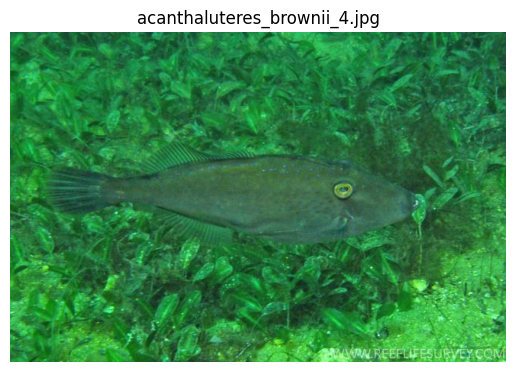

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_ROOTS = [
    "/content/dataset/Fish_Data/images/cropped",
    "/content/dataset/Fish_Data/images/raw_images",
    "/content/dataset/Fish_Data/images/numbered"
]

for p in IMAGE_ROOTS:
    print(p, "->", os.path.exists(p))

sample = "acanthaluteres_brownii_4.jpg"
sample_lower = sample.lower()

found_paths = []

for root_dir in IMAGE_ROOTS:
    if not os.path.exists(root_dir):
        continue

    for root, dirs, files in os.walk(root_dir):
        files_lower = {f.lower(): f for f in files}
        if sample_lower in files_lower:
            found_paths.append(os.path.join(root, files_lower[sample_lower]))

print("Bulunan dosyalar:")
for p in found_paths:
    print(p)

if found_paths:
    with Image.open(found_paths[0]) as img:
        plt.imshow(img)
        plt.title(sample)
        plt.axis("off")
        plt.show()
else:
    print("Görsel bulunamadı")



In [ ]:
import os

ROOT = "/content/dataset/Fish_Data/images"
EXTS = (".jpg", ".jpeg", ".png")

for folder in ["raw_images", "numbered", "cropped"]:
    path = os.path.join(ROOT, folder)

    if not os.path.exists(path):
        print(folder, "-> ❌ klasör yok")
        continue

    count = 0
    for r, d, f in os.walk(path):
        count += sum(1 for x in f if x.lower().endswith(EXTS))

    print(folder, "->", count, "image")

raw_images -> 4405 image
numbered -> 4411 image
cropped -> 4415 image


In [ ]:
import os
import random

IMAGE_ROOT = "/content/dataset/Fish_Data/images/raw_images"

sample_files = []

for root, dirs, files in os.walk(IMAGE_ROOT):
    for f in files:
        if f.lower().endswith(".jpg"):
            sample_files.append(os.path.join(root, f))

assert len(sample_files) > 0, "Hiç jpg bulunamadı"


sample_files = random.sample(sample_files, min(20, len(sample_files)))

sample_files

['/content/dataset/Fish_Data/images/raw_images/lutjanus_quinquelineatus_8.jpg',
 '/content/dataset/Fish_Data/images/raw_images/thunnus_albacares_6.jpg',
 '/content/dataset/Fish_Data/images/raw_images/sardinops_sagax_6.jpg',
 '/content/dataset/Fish_Data/images/raw_images/epinephelus_quoyanus_4.jpg',
 '/content/dataset/Fish_Data/images/raw_images/bothus_myriaster_4.jpg',
 '/content/dataset/Fish_Data/images/raw_images/cantherhines_dumerilii_20.jpg',
 '/content/dataset/Fish_Data/images/raw_images/meuschenia_hippocrepis_2.jpg',
 '/content/dataset/Fish_Data/images/raw_images/sphyraena_jello_9.jpg',
 '/content/dataset/Fish_Data/images/raw_images/etelis_carbunculus_6.jpg',
 '/content/dataset/Fish_Data/images/raw_images/carcharhinus_albimarginatus_9.jpg',
 '/content/dataset/Fish_Data/images/raw_images/liopropoma_mitratum_3.jpg',
 '/content/dataset/Fish_Data/images/raw_images/scolopsis_monogramma_11.jpg',
 '/content/dataset/Fish_Data/images/raw_images/epinephelus_morrhua_5.jpg',
 '/content/datas

In [ ]:
import os
from collections import Counter

IMAGE_ROOT = "/content/dataset/Fish_Data/images/raw_images"

species_list = []

for root, dirs, files in os.walk(IMAGE_ROOT):
    for f in files:
        if f.lower().endswith(".jpg"):
            
            species = "_".join(f.split("_")[:-1])
            species_list.append(species)

species_counts = Counter(species_list)

print("Toplam tür:", len(species_counts))
print("Örnek türler:", list(species_counts.items())[:5])


Toplam tür: 484
Örnek türler: [('anampses_meleagrides', 14), ('lethrinus_semicinctus', 4), ('cirrhilabrus_condei', 4), ('pseudojuloides_cerasinus', 7), ('lniistius_aneitensis', 14)]


In [ ]:
import os
import pandas as pd

IMAGE_ROOT = "/content/dataset/Fish_Data/images/raw_images"

records = []

for root, dirs, files in os.walk(IMAGE_ROOT):
    for f in files:
        if not f.lower().endswith(".jpg"):
            continue

        name = os.path.splitext(f)[0]
        parts = name.split("_")

        if parts[-1].isdigit():
            species = "_".join(parts[:-1])
        else:
            species = name  

        records.append({
            "species": species.lower(),
            "image_name": f,
            "image_path": os.path.join(root, f)
        })

df = pd.DataFrame(records)

print("Toplam görüntü:", len(df))
print("Toplam tür:", df["species"].nunique())
df.head()




Toplam görüntü: 4405
Toplam tür: 484


,species,image_name,image_path
0,anampses_meleagrides,anampses_meleagrides_2.jpg,/content/dataset/Fish_Data/images/raw_images/a...
1,lethrinus_semicinctus,lethrinus_semicinctus_4.jpg,/content/dataset/Fish_Data/images/raw_images/l...
2,cirrhilabrus_condei,cirrhilabrus_condei_1.jpg,/content/dataset/Fish_Data/images/raw_images/c...
3,pseudojuloides_cerasinus,pseudojuloides_cerasinus_4.jpg,/content/dataset/Fish_Data/images/raw_images/p...
4,lniistius_aneitensis,lniistius_aneitensis_4.jpg,/content/dataset/Fish_Data/images/raw_images/l...


In [ ]:
if df.empty:
    print("df boş, tür dağılımı hesaplanamaz")
else:
    counts = df["species"].value_counts()

    print(counts.describe())
    print("En çok örnekli tür:", counts.idxmax(), counts.max())
    print("En az örnekli tür:", counts.idxmin(), counts.min())

    imbalance_ratio = counts.max() / counts.min()
    print("Dengesizlik oranı (max/min):", round(imbalance_ratio, 2))





count    484.000000
mean       9.101240
std        5.007249
min        1.000000
25%        5.000000
50%        8.000000
75%       12.000000
max       26.000000
Name: count, dtype: float64
En çok örnekli tür: oxymonacanthus_longirostris 26
En az örnekli tür: a73egsp 1
Dengesizlik oranı (max/min): 26.0


In [ ]:
import os
import shutil
from tqdm import tqdm

SRC_ROOT = "/content/dataset/Fish_Data/images/raw_images"
DST_ROOT = "/content/data_by_species"

os.makedirs(DST_ROOT, exist_ok=True)

copied = 0

for root, dirs, files in os.walk(SRC_ROOT):
    for f in files:
        if not f.lower().endswith(".jpg"):
            continue

        name = os.path.splitext(f)[0]
        parts = name.split("_")

        # son parça sayıysa tür ondan önceki kısım
        if parts[-1].isdigit():
            species = "_".join(parts[:-1])
        else:
            species = name

        species = species.lower()

        src_path = os.path.join(root, f)
        dst_dir = os.path.join(DST_ROOT, species)
        os.makedirs(dst_dir, exist_ok=True)

        dst_path = os.path.join(dst_dir, f)

        if not os.path.exists(dst_path):
            shutil.copy2(src_path, dst_path)
            copied += 1

print("✅ Kopyalanan görüntü sayısı:", copied)
print("✅ Toplam tür sayısı:", len(os.listdir(DST_ROOT)))



✅ Kopyalanan görüntü sayısı: 0
✅ Toplam tür sayısı: 484


In [ ]:
import os

counts = {
    species: len([
        f for f in os.listdir(os.path.join("/content/data_by_species", species))
        if f.lower().endswith(".jpg")
    ])
    for species in os.listdir("/content/data_by_species")
}

sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]

sorted(counts.items(), key=lambda x: x[1])[:5]




[('a73egsp', 1),
 ('carangoides_chrysophrys', 3),
 ('cymolutes_torquatus', 3),
 ('eubalichthys_cyanoura', 3),
 ('negaprion_acutidens', 3)]

In [ ]:
import os, shutil

SRC = "/content/data_by_species"
DST = "/content/data_by_species_clean"
MIN_IMAGES = 5

if os.path.exists(DST):
    shutil.rmtree(DST)
os.makedirs(DST, exist_ok=True)

kept, removed = 0, 0
kept_imgs, removed_imgs = 0, 0

for species in os.listdir(SRC):
    sp_dir = os.path.join(SRC, species)
    if not os.path.isdir(sp_dir):
        continue

    imgs = [f for f in os.listdir(sp_dir) if f.lower().endswith(".jpg")]
    n = len(imgs)

    if n < MIN_IMAGES:
        removed += 1
        removed_imgs += n
        continue

    dst_dir = os.path.join(DST, species)
    os.makedirs(dst_dir, exist_ok=True)
    for f in imgs:
        shutil.copy2(os.path.join(sp_dir, f), os.path.join(dst_dir, f))

    kept += 1
    kept_imgs += n

print("Kalan tür:", kept, "| Kalan görsel:", kept_imgs)
print("Atılan tür:", removed, "| Atılan görsel:", removed_imgs)



Kalan tür: 383 | Kalan görsel: 4042
Atılan tür: 101 | Atılan görsel: 363


In [ ]:
import os

DST = "/content/data_by_species_clean"

counts = {
    sp: len([f for f in os.listdir(os.path.join(DST, sp)) if f.lower().endswith(".jpg")])
    for sp in os.listdir(DST)
}

vals = list(counts.values())

print("Toplam tür:", len(vals))
print("Min:", min(vals))
print("Max:", max(vals))

imbalance_ratio = max(vals) / min(vals)
print("Dengesizlik oranı (max/min):", round(imbalance_ratio, 2))

print("\nEn az örnekli türler:")
print(sorted(counts.items(), key=lambda x: x[1])[:5])

print("\nEn çok örnekli türler:")
print(sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5])




Toplam tür: 383
Min: 5
Max: 26
Dengesizlik oranı (max/min): 5.2

En az örnekli türler:
[('lutjanus_semicinctus_quoy', 5), ('cephalopholis_igarashiensis', 5), ('scolopsis_lineata', 5), ('paraplagusia_bilineata', 5), ('oedalechilus_labiosus', 5)]

En çok örnekli türler:
[('caranx_melampygus', 26), ('oxymonacanthus_longirostris', 26), ('cantherhines_pardalis', 24), ('lethrinus_nebulosus', 23), ('pseudanthias_squamipinnis', 23)]


In [ ]:
counts = df["species"].value_counts()
VALID_SPECIES = counts[counts >= 5].index

df_subset = df[df["species"].isin(VALID_SPECIES)].reset_index(drop=True)

print("Kalan tür:", df_subset["species"].nunique())
print("Toplam örnek:", len(df_subset))

print("Min örnek (df_subset):", df_subset["species"].value_counts().min())




Kalan tür: 383
Toplam örnek: 4042
Min örnek (df_subset): 5


In [ ]:
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(
    df_subset,
    test_size=0.2,
    stratify=df_subset["species"],
    random_state=42
)

print("Train örnek:", len(train_df))
print("Val örnek:", len(val_df))
print("Train tür:", train_df['species'].nunique())
print("Val tür:", val_df['species'].nunique())




Train örnek: 3233
Val örnek: 809
Train tür: 383
Val tür: 383


In [ ]:
labels = sorted(df_subset["species"].unique())
label2idx = {l:i for i,l in enumerate(labels)}
idx2label = {i:l for l,i in label2idx.items()}

num_classes = len(labels)
num_classes



383

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os

class FishMetricDataset(Dataset):
    def __init__(self, df, label2idx, transform=None):
        self.df = df.reset_index(drop=True)
        self.label2idx = label2idx
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = row["image_path"]

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            raise RuntimeError(f"Görsel okunamadı: {img_path}") from e

        label = self.label2idx[row["species"]]

        if self.transform:
            image = self.transform(image)

        return image, label




In [ ]:
class TripletBatchSampler(Sampler):
    def __init__(self, labels, batch_size=64, m=4):
        self.labels = labels
        self.batch_size = batch_size
        self.m = m

        assert batch_size % m == 0

        self.label_to_indices = {}
        for idx, lbl in enumerate(labels):
            self.label_to_indices.setdefault(lbl, []).append(idx)

        self.valid_labels = [
            lbl for lbl, idxs in self.label_to_indices.items()
            if len(idxs) >= m
        ]

        self.classes_per_batch = batch_size // m
        self.num_batches = len(labels) // batch_size

    def __iter__(self):
        for _ in range(self.num_batches):
            batch = []
            chosen_labels = random.sample(self.valid_labels, self.classes_per_batch)

            for lbl in chosen_labels:
                batch.extend(random.sample(self.label_to_indices[lbl], self.m))

            random.shuffle(batch)
            yield batch  

    def __len__(self):
        return self.num_batches

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

train_tf = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])



val_tf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_ds = FishMetricDataset(train_df, label2idx, transform=train_tf)
val_ds   = FishMetricDataset(val_df,   label2idx, transform=val_tf)


train_sampler = TripletBatchSampler(
    labels=[label2idx[s] for s in train_df["species"]],
    batch_size=32,
    m=2
)


train_sampler = TripletBatchSampler(
    labels=[label2idx[s] for s in train_df["species"]],
    batch_size=64,
    m=4
)

train_loader = DataLoader(
    train_ds,
    batch_sampler=train_sampler,  
    num_workers=2,
    pin_memory=True
)


val_loader = DataLoader(
    val_ds,
    batch_size=64,
    shuffle=False,
    num_workers=2
)




In [ ]:
imgs, labels = next(iter(train_loader))
print(torch.unique(labels, return_counts=True))


(tensor([  9,  22,  31,  63,  68,  75, 154, 190, 196, 213, 218, 270, 302, 316,
        360, 380]), tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [ ]:
train_loader = DataLoader(
    train_ds,
    batch_sampler=train_sampler,   
    num_workers=2
)

val_loader = DataLoader(
    val_ds,
    batch_size=64,
    shuffle=False,
    num_workers=2
)




In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class MetricNet(nn.Module):
    def __init__(self, embedding_dim=128):
        super().__init__()
        base = models.efficientnet_b0(weights="DEFAULT")
        in_features = base.classifier[1].in_features
        base.classifier = nn.Identity()
        self.backbone = base
        self.head = nn.Linear(in_features, embedding_dim)

    def forward(self, x):
        x = self.backbone(x)
        x = self.head(x)
        x = F.normalize(x, p=2, dim=1)
        return x

model = MetricNet(embedding_dim=128).to(device)



In [ ]:
from collections import defaultdict
import random
from torch.utils.data import Sampler

class ClassBalancedSampler(Sampler):
    def __init__(self, labels, batch_size):
        self.batch_size = batch_size
        self.cls2idx = defaultdict(list)
        for i, lbl in enumerate(labels):
            self.cls2idx[lbl].append(i)
        self.classes = list(self.cls2idx.keys())

    def __iter__(self):
        batch = []
        while True:
            cls = random.choice(self.classes)
            idxs = random.sample(
                self.cls2idx[cls],
                min(2, len(self.cls2idx[cls])) 
            )
            batch.extend(idxs)
            if len(batch) >= self.batch_size:
                yield from batch[:self.batch_size]
                batch = []

    def __len__(self):
        return sum(len(v) for v in self.cls2idx.values())


In [ ]:
def batch_hard_triplets(embeddings, labels, margin=0.2):

    B = embeddings.size(0)
    labels = labels.view(-1)

    dist = torch.cdist(embeddings, embeddings, p=2)

    label_eq = labels.unsqueeze(0) == labels.unsqueeze(1)
    eye = torch.eye(B, device=embeddings.device).bool()
    pos_mask = label_eq & (~eye)
    neg_mask = ~label_eq

    anchors, positives, negatives = [], [], []

    for i in range(B):
        pos_idx = torch.where(pos_mask[i])[0]
        neg_idx = torch.where(neg_mask[i])[0]

        if len(pos_idx) == 0 or len(neg_idx) == 0:
            continue

        p = pos_idx[torch.argmax(dist[i, pos_idx])]
        n = neg_idx[torch.argmin(dist[i, neg_idx])]

        anchors.append(i)
        positives.append(p.item())
        negatives.append(n.item())

    if len(anchors) == 0:
        return None

    a = embeddings[torch.tensor(anchors, device=embeddings.device)]
    p = embeddings[torch.tensor(positives, device=embeddings.device)]
    n = embeddings[torch.tensor(negatives, device=embeddings.device)]
    return a, p, n




In [ ]:
triplet_loss = nn.TripletMarginWithDistanceLoss(
    distance_function=lambda x, y: 1.0 - (x*y).sum(dim=1),  
    margin=0.2,
    reduction="mean"
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)



In [ ]:
def train_one_epoch(model, loader):
    model.train()
    running = 0.0
    steps = 0

    for x, y in tqdm(loader, leave=False):
        x = x.to(device)
        y = y.to(device)

        emb = model(x)

        trip = batch_hard_triplets(emb, y, margin=0.2)
        if trip is None:
            continue

        a, p, n = trip
        loss = triplet_loss(a, p, n)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running += loss.item()
        steps += 1

    return running / max(steps, 1)


In [ ]:
@torch.no_grad()
def build_embedding_bank(model, df_ref, transform, batch_size=64):
 
    ds = FishMetricDataset(df_ref, label2idx, transform=transform)
    loader = DataLoader(ds, batch_size=batch_size, shuffle=False, num_workers=2)

    embs, labels = [], []
    model.eval()
    for x, y in loader:
        x = x.to(device)
        y = y.to(device)
        e = model(x)
        embs.append(e.cpu())
        labels.append(y.cpu())
    embs = torch.cat(embs, dim=0)
    labels = torch.cat(labels, dim=0)
    return embs, labels

@torch.no_grad()
def retrieval_metrics(model, bank_embs, bank_labels, loader, topk=(1,5)):
    model.eval()
    correct = {k:0 for k in topk}
    total = 0

    bank_embs = bank_embs.to(device)
    bank_labels = bank_labels.to(device)

    for x, y in loader:
        x = x.to(device)
        y = y.to(device)
        q = model(x)

        sim = q @ bank_embs.t()
        maxk = max(topk)
        nn_idx = sim.topk(maxk, dim=1).indices
        nn_labels = bank_labels[nn_idx]

        for k in topk:
            pred_k = nn_labels[:, :k]
            hit = (pred_k == y.unsqueeze(1)).any(dim=1).sum().item()
            correct[k] += hit

        total += y.size(0)

    return {f"top{k}": correct[k]/max(total,1) for k in topk}


In [ ]:
from collections import defaultdict
import torch

def build_class_prototypes(bank_embs, bank_labels):
    cls2embs = defaultdict(list)

    for emb, lbl in zip(bank_embs, bank_labels):
        cls2embs[lbl].append(emb)

    proto_embs = []
    proto_labels = []

    for lbl, embs in cls2embs.items():
        embs = torch.stack(embs)
        proto = torch.mean(embs, dim=0)
        proto = torch.nn.functional.normalize(proto, dim=0)
        proto_embs.append(proto)
        proto_labels.append(lbl)

    return torch.stack(proto_embs), proto_labels


In [ ]:
EPOCHS = 60
history = []

for epoch in range(1, EPOCHS + 1):
    train_loss = train_one_epoch(model, train_loader)
    print(f"Epoch {epoch:02d} | loss={train_loss:.4f}")
    history.append({"epoch": epoch, "loss": train_loss})



Epoch 01 | loss=0.3551


Epoch 02 | loss=0.2715


Epoch 03 | loss=0.2335


Epoch 04 | loss=0.2140


Epoch 05 | loss=0.2102


Epoch 06 | loss=0.2053


Epoch 07 | loss=0.1959


Epoch 08 | loss=0.1921


Epoch 09 | loss=0.1746


Epoch 10 | loss=0.1572


Epoch 11 | loss=0.1352


Epoch 12 | loss=0.1196


Epoch 13 | loss=0.1089


Epoch 14 | loss=0.0996


Epoch 15 | loss=0.0791


Epoch 16 | loss=0.0871


Epoch 17 | loss=0.0607


Epoch 18 | loss=0.0558


Epoch 19 | loss=0.0505


Epoch 20 | loss=0.0565


Epoch 21 | loss=0.0473


Epoch 22 | loss=0.0388


Epoch 23 | loss=0.0363


Epoch 24 | loss=0.0436


Epoch 25 | loss=0.0374


Epoch 26 | loss=0.0330


Epoch 27 | loss=0.0311


Epoch 28 | loss=0.0354


Epoch 29 | loss=0.0259


Epoch 30 | loss=0.0265


Epoch 31 | loss=0.0238


Epoch 32 | loss=0.0244


Epoch 33 | loss=0.0255


Epoch 34 | loss=0.0245


Epoch 35 | loss=0.0180


Epoch 36 | loss=0.0228


Epoch 37 | loss=0.0203


Epoch 38 | loss=0.0188


Epoch 39 | loss=0.0179


Epoch 40 | loss=0.0217


Epoch 41 | loss=0.0191


Epoch 42 | loss=0.0192


Epoch 43 | loss=0.0171


Epoch 44 | loss=0.0168


Epoch 45 | loss=0.0186


Epoch 46 | loss=0.0165


Epoch 47 | loss=0.0164


Epoch 48 | loss=0.0124


Epoch 49 | loss=0.0157


Epoch 50 | loss=0.0152


Epoch 51 | loss=0.0139


Epoch 52 | loss=0.0165


Epoch 53 | loss=0.0153


Epoch 54 | loss=0.0155


Epoch 55 | loss=0.0112


Epoch 56 | loss=0.0126


Epoch 57 | loss=0.0074


Epoch 58 | loss=0.0128


Epoch 59 | loss=0.0109


Epoch 60 | loss=0.0084


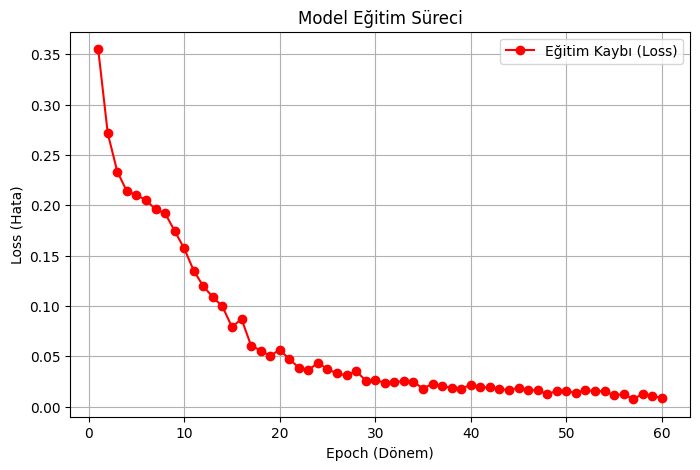

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(hist_df["epoch"], hist_df["loss"], label="Eğitim Kaybı (Loss)", color='red', marker="o")

plt.title("Model Eğitim Süreci")
plt.xlabel("Epoch (Dönem)")
plt.ylabel("Loss (Hata)")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
@torch.no_grad()
def build_topk_confusion(model, bank_embs, bank_labels, loader, k=5):
    model.eval()
    bank_labels_np = np.array(bank_labels)

    match_count = 0 

    for x, y in loader:
        x = x.to(device)
        y_numpy = y.cpu().numpy()
        q = model(x)
        sim = q @ bank_embs.to(device).t()
        idx = sim.topk(k, dim=1).indices.cpu().numpy()
        preds = bank_labels_np[idx]

        for true_idx, pred_k in zip(y_numpy, preds):
           
            true_lbl = idx2label.get(true_idx, "BİLİNMİYOR")

            
            if true_lbl not in label_to_plot:
                continue

            row = label_to_plot[true_lbl]

            for p_lbl in pred_k:
              
                if p_lbl in label_to_plot:
                    col = label_to_plot[p_lbl]
                    cm[row, col] += 1
                    match_count += 1

    print(f"İşlem tamamlandı. Matrise toplam {match_count} kayıt eklendi.")
    if match_count == 0:
        print("UYARI: Hiç eşleşme bulunamadı! Lütfen şunları kontrol edin:")
        print(f"Örnek bir gerçek etiket: '{true_lbl}'")
        print(f"label_to_plot içindeki örnekler: {list(label_to_plot.keys())[:3]}")


cm = np.zeros((20, 20))
build_topk_confusion(model, bank_embs, bank_labels, val_loader, k=5)

İşlem tamamlandı. Matrise toplam 48 kayıt eklendi.


In [ ]:
confusions = []

for i in range(len(cm)):
    for j in range(len(cm)):
        
        if i != j and cm[i,j] > 0:
            confusions.append((top_species[i], top_species[j], cm[i,j]))


if len(confusions) > 0:
    conf_df = (
        pd.DataFrame(confusions, columns=["True", "Pred", "Count"])
        .sort_values("Count", ascending=False)
        .head(10)
    )
    print("En Çok Karıştırılan Türler:")
    display(conf_df) 
else:
    print("Hiç karışıklık bulunamadı. Modeliniz bu 20 türde mükemmel çalışıyor olabilir veya cm matrisi boş.")


En Çok Karıştırılan Türler:


,True,Pred,Count
2,oxymonacanthus_longirostris,lutjanus_bohar,3.0
12,monotaxis_grandoculis,lutjanus_fulviflamma,3.0
23,leptojulis_cyanopleura,pseudanthias_squamipinnis,3.0
22,leptojulis_cyanopleura,lethrinus_nebulosus,2.0
5,pseudanthias_squamipinnis,halichoeres_melanurus,2.0
24,coris_batuensis,pseudanthias_squamipinnis,2.0
11,stethojulis_interrupta,cheilinus_chlorourus,2.0
0,oxymonacanthus_longirostris,pseudanthias_squamipinnis,2.0
3,oxymonacanthus_longirostris,lutjanus_sebae,1.0
1,oxymonacanthus_longirostris,lutjanus_fulviflamma,1.0


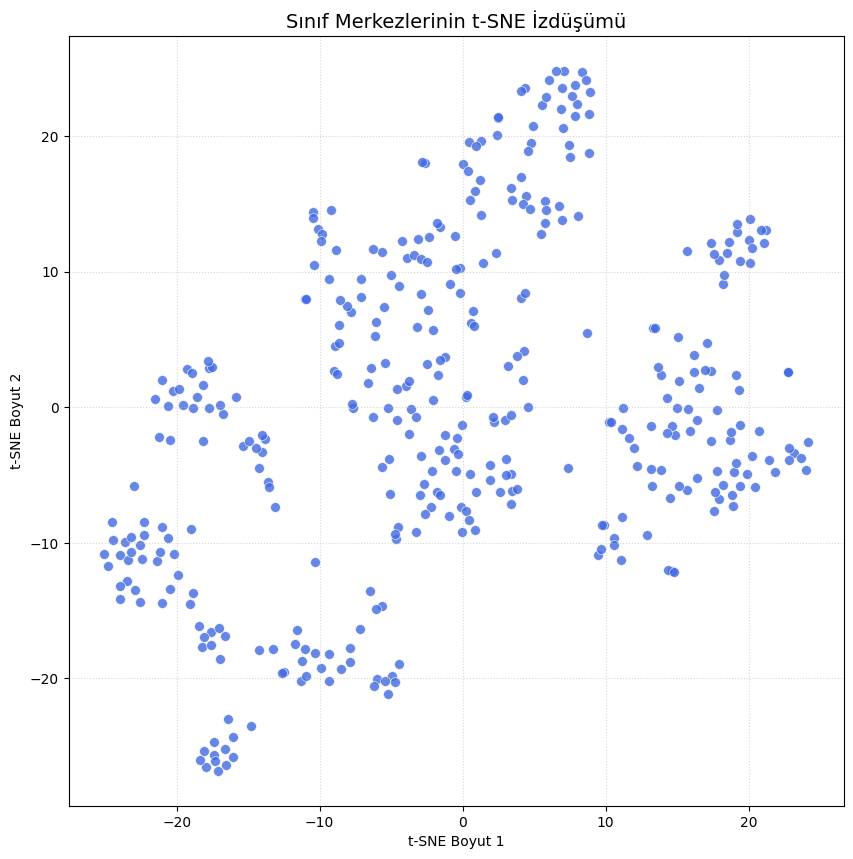

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


label_to_idx = {v: k for k, v in idx2label.items()}

if not isinstance(bank_labels, torch.Tensor):
    processed_labels = [label_to_idx[l] if isinstance(l, str) else l for l in bank_labels]
    bank_labels_tensor = torch.tensor(processed_labels)
else:
    bank_labels_tensor = bank_labels


centroids = []
unique_labels = torch.unique(bank_labels_tensor)

for lbl in unique_labels:
    mask = (bank_labels_tensor == lbl)
    class_embs = bank_embs[mask]
    if len(class_embs) > 0:
        centroids.append(class_embs.mean(dim=0).cpu().numpy())

centroids = np.array(centroids)


n_samples = centroids.shape[0]
if n_samples < 2:
    print("Hata: t-SNE için yeterli sınıf yok.")
else:
    current_perplexity = min(30, n_samples - 1)

    tsne = TSNE(
        n_components=2,
        perplexity=current_perplexity,
        random_state=42,
        init='pca',
        learning_rate='auto'
    )
    centroids_2d = tsne.fit_transform(centroids)

    plt.figure(figsize=(10, 10))
    plt.scatter(
        centroids_2d[:, 0],
        centroids_2d[:, 1],
        s=50,
        alpha=0.8,
        c='royalblue',
        edgecolors='white',
        linewidth=0.5
    )

    plt.title("Sınıf Merkezlerinin t-SNE İzdüşümü", fontsize=14)
    plt.xlabel("t-SNE Boyut 1")
    plt.ylabel("t-SNE Boyut 2")
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.show()

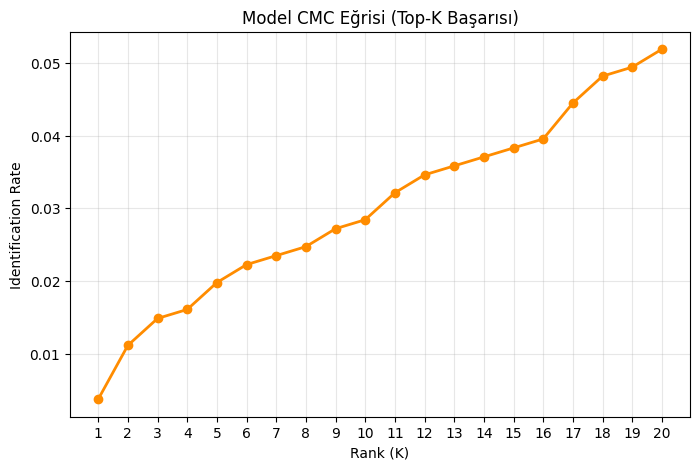

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

@torch.no_grad()
def cmc_curve(model, bank_embs, bank_labels, loader, max_k=20):
    model.eval()
    hits = np.zeros(max_k)
    total = 0

    label_to_idx = {v: k for k, v in idx2label.items()}

    if not isinstance(bank_labels, torch.Tensor):
        processed_labels = [label_to_idx[l] if isinstance(l, str) else l for l in bank_labels]
        bank_labels = torch.tensor(processed_labels).to(device)
    else:
        bank_labels = bank_labels.to(device)

    bank_embs = bank_embs.to(device)

    for x, y in loader:
        x = x.to(device)
        y = y.to(device) 

        q = model(x)
        sim = q @ bank_embs.t()


        idx = sim.topk(max_k, dim=1).indices
        preds = bank_labels[idx]

     
        correct = (preds == y.view(-1, 1))

        for k in range(max_k):
            
            has_hit = correct[:, :k+1].any(dim=1)
            hits[k] += has_hit.sum().item()

        total += x.size(0)

    return hits / total


cmc = cmc_curve(model, bank_embs, bank_labels, val_loader, max_k=20)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), cmc, marker="o", color='darkorange', linewidth=2)
plt.xticks(range(1, 21))
plt.xlabel("Rank (K)")
plt.ylabel("Identification Rate")
plt.title("Model CMC Eğrisi (Top-K Başarısı)")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from collections import defaultdict
import pandas as pd
import torch
import numpy as np

@torch.no_grad()
def per_class_accuracy_topk(model, bank_embs, bank_labels, loader, k=5):
    model.eval()
    bank_embs = bank_embs.to(device)


    bank_labels_np = np.array(bank_labels)

    correct_counts = defaultdict(int)
    total_counts = defaultdict(int)

    for x, y in loader:
        x = x.to(device)
        y_cpu = y.cpu().numpy()

        q = model(x)
        sim = q @ bank_embs.t()

        
        idx = sim.topk(k, dim=1).indices.cpu().numpy()

    
        preds = bank_labels_np[idx]

        for i in range(len(y_cpu)):
            true_idx = y_cpu[i]
            true_sp = idx2label[true_idx]

            total_counts[true_sp] += 1

         
            if true_sp in preds[i]:
                correct_counts[true_sp] += 1

    data = []
    for sp in total_counts:
        acc = correct_counts[sp] / total_counts[sp]
        data.append({"species": sp, "top5_acc": acc})

    df = pd.DataFrame(data)
    return df


acc5_df = per_class_accuracy_topk(
    model, bank_embs, bank_labels, val_loader, k=5
)


print("En düşük başarıya sahip türler:")
display(acc5_df.sort_values("top5_acc").head(10))

En düşük başarıya sahip türler:


,species,top5_acc
250,plectranthias_winniensis,0.0
262,carcharhinus_amblyrhynchos,0.0
261,thalassoma_jansenii,0.0
260,halichoeres_nebulosus,0.0
259,lethrinus_harak,0.0
258,bodianus_diana,0.0
257,trachinotus_baillonii,0.0
256,pteragogus_cryptus,0.0
255,labropsis_manabei,0.0
254,retropinna_semoni,0.0


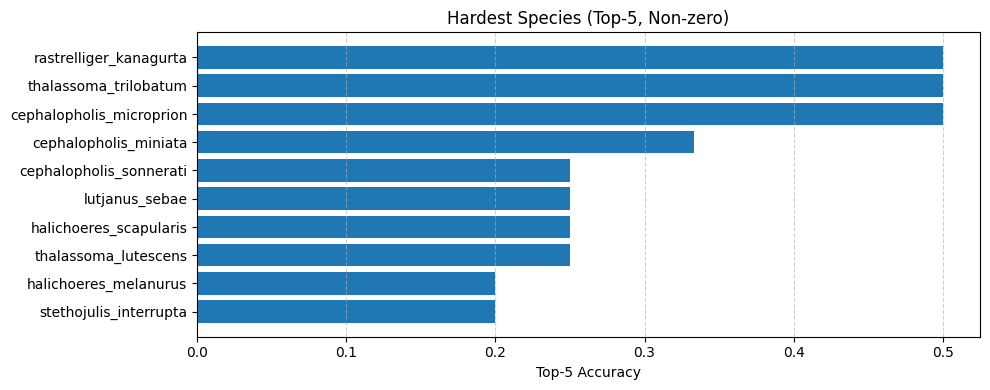

In [ ]:



hard5 = (
    acc5_df[acc5_df["top5_acc"] > 0]
    .sort_values("top5_acc")
    .head(10)
    .sort_values("top5_acc")
)

plt.figure(figsize=(10,4))
plt.barh(hard5["species"], hard5["top5_acc"])
plt.xlabel("Top-5 Accuracy")
plt.title("Hardest Species (Top-5, Non-zero)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




In [ ]:
@torch.no_grad()
def predict_class_knn(model, bank_embs, bank_labels, loader, k=5):
    model.eval()
    preds, gts = [], []

    bank_embs = bank_embs.to(device)
    bank_labels = bank_labels.to(device)

    for x, y in loader:
        x = x.to(device)
        y = y.to(device)

        q = model(x)
        sim = q @ bank_embs.t()
        sim.fill_diagonal_(-1e9)  

        idx = sim.topk(k, dim=1).indices
        nn_labels = bank_labels[idx]

        for i in range(nn_labels.size(0)):
            vals, counts = torch.unique(nn_labels[i], return_counts=True)
            pred = vals[counts.argmax()].item()
            preds.append(pred)
            gts.append(y[i].item())

    return preds, gts


In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn.functional as F
from torchvision import transforms

class ImagePathDataset(Dataset):
    def __init__(self, df, transform):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        img_path = self.df.loc[i, "image_path"]
        label = self.df.loc[i, "species"]   # STRING
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)
        return image, label


In [ ]:
bank_tf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])


In [ ]:
@torch.no_grad()
def build_embedding_bank(model, df, transform, batch_size=64):
    device = next(model.parameters()).device
    model.eval()

    ds = ImagePathDataset(df, transform)

    dl = DataLoader(
        ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,   
        pin_memory=True
    )

    all_embs = []
    all_labels = []

    for x, y in dl:
        x = x.to(device)
        emb = model(x)
        emb = F.normalize(emb, dim=1)
        all_embs.append(emb.cpu())
        all_labels.extend(y)

    bank_embs = torch.cat(all_embs, dim=0)
    bank_labels = all_labels

    return bank_embs, bank_labels


In [ ]:
bank_embs, bank_labels = build_embedding_bank(
    model,
    train_df,
    bank_tf,
    batch_size=64
)

torch.save({
    "embs": bank_embs,
    "labels": bank_labels
}, "embedding_bank.pt")

print("✅ embedding_bank.pt kaydedildi", bank_embs.shape, len(bank_labels))


✅ embedding_bank.pt kaydedildi torch.Size([3233, 128]) 3233


In [ ]:
import os

def get_last_uploaded_image(folder="/content"):
    image_files = [
        os.path.join(folder, f)
        for f in os.listdir(folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    if len(image_files) == 0:
        raise FileNotFoundError("❌ /content içinde hiç görsel yok.")

    return max(image_files, key=os.path.getmtime)


In [ ]:
import torch
from PIL import Image

@torch.no_grad()
def predict_single_image(
    img_path,
    model,
    proto_embs,
    proto_labels,
    tf,
    device,
    topk=5
):
    model.eval()

    img = Image.open(img_path).convert("RGB")
    x = tf(img).unsqueeze(0).to(device)

    q = model(x)
    q = F.normalize(q, dim=1)

    proto = proto_embs.to(device)
    sim = q @ proto.t()

    vals, idx = sim.topk(topk, dim=1)

    results = []
    for s, i in zip(vals[0], idx[0]):
        results.append((proto_labels[i], float(s.item())))
    return results




In [ ]:
proto_embs, proto_labels = build_class_prototypes(
    bank_embs,
    bank_labels
)


In [ ]:
print(results[:5])



[('epinephelus_ongus', 0.9822797179222107), ('dotalabrus_aurantiacus', 0.0132399071007967), ('epinephelus_coeruleopunctatus', 0.0026384578086435795), ('macolor_macularis', 0.0010406040819361806), ('anampses_melanurus', 0.0006537071894854307)]


In [ ]:
device = next(model.parameters()).device
img_path = get_last_uploaded_image("/content")

results = predict_force(
    img_path=img_path,
    model=model,
    proto_embs=proto_embs,
    proto_labels=proto_labels,
    tf=bank_tf,
    device=device,
    topk=5,
    temperature=0.01
)

for i, (cls, score) in enumerate(results, 1):
    print(f"{i}. {cls}  (prob = {score:.3f})")




1. anampses_melanurus  (prob = 0.457)
2. epinephelus_ongus  (prob = 0.404)
3. epinephelus_coeruleopunctatus  (prob = 0.115)
4. dotalabrus_aurantiacus  (prob = 0.024)
5. anampses_meleagrides  (prob = 0.000)


In [ ]:
from collections import defaultdict
import torch
import torch.nn.functional as F

def build_class_prototypes(bank_embs, bank_labels):
    cls2 = defaultdict(list)
    for emb, lbl in zip(bank_embs, bank_labels):
        cls2[lbl].append(emb)

    proto_embs, proto_labels = [], []
    for lbl, embs in cls2.items():
        embs = torch.stack(embs, dim=0)
        proto = embs.mean(dim=0)
        proto = F.normalize(proto, dim=0)
        proto_embs.append(proto)
        proto_labels.append(lbl)

    return torch.stack(proto_embs, dim=0), proto_labels


In [ ]:
model.eval()

print("🔄 Banka güncelleniyor, lütfen bekle...")
bank_embs, bank_labels = build_embedding_bank(model, train_df, bank_tf)
bank_embs = bank_embs.to(device)
print("✅ Banka güncellendi!")

🔄 Banka güncelleniyor, lütfen bekle...
✅ Banka güncellendi!


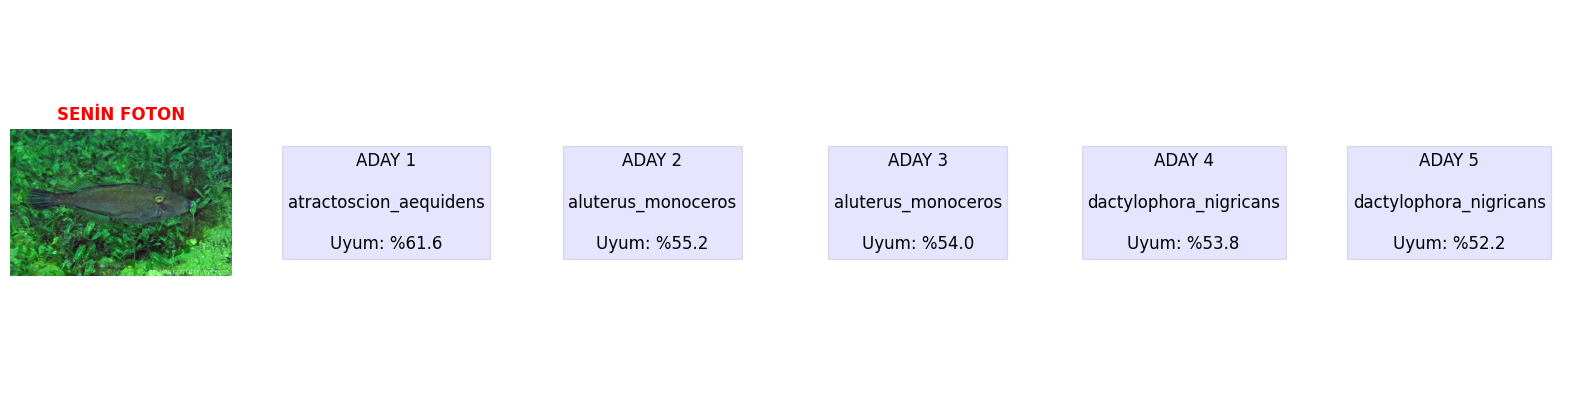

In [ ]:
import torch.nn.functional as F

def final_debug_predict(image_path, model, bank_embs, bank_labels, transform, k=5):
    model.eval()

    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        query_emb = model(img_t)


        query_emb_norm = F.normalize(query_emb, p=2, dim=1)
        bank_embs_norm = F.normalize(bank_embs, p=2, dim=1)

        sim = query_emb_norm @ bank_embs_norm.t()
        scores, indices = sim.topk(k, dim=1)


    plt.figure(figsize=(20, 5))

 
    plt.subplot(1, k+1, 1)
    plt.imshow(img)
    plt.title("SENİN FOTON", color='red', fontweight='bold')
    plt.axis('off')


    for i in range(k):
        idx = indices[0][i].item()
        score = scores[0][i].item()
        label = bank_labels[idx]

        plt.subplot(1, k+1, i+2)
        plt.text(0.5, 0.5, f"ADAY {i+1}\n\n{label}\n\nUyum: %{score*100:.1f}",
                 ha='center', va='center', fontsize=12,
                 bbox=dict(facecolor='blue', alpha=0.1))
        plt.axis('off')

    plt.show()

final_debug_predict(image_name, model, bank_embs, bank_labels, bank_tf)

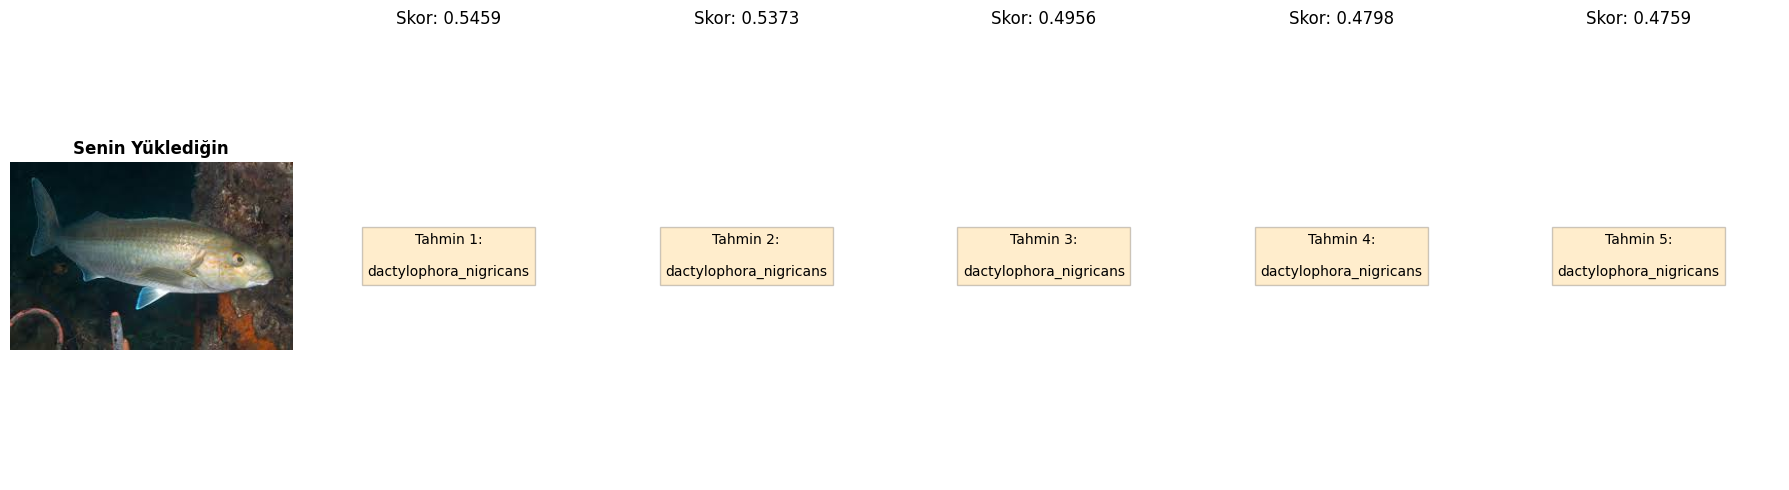

In [ ]:
image_name = "/content/images-14.jpeg"

def predict_top5_fish(image_path, model, bank_embs, bank_labels, transform):
    model.eval()

    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        query_emb = model(img_t)

    sim = query_emb @ bank_embs.to(device).t()
    scores, indices = sim.topk(5, dim=1)

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 6, 1)
    plt.imshow(img)
    plt.title("Senin Yüklediğin", fontweight='bold')
    plt.axis('off')

    for i in range(5):
        idx = indices[0][i].item()
        score = scores[0][i].item()
        label = bank_labels[idx]

        plt.subplot(1, 6, i+2)

        plt.text(0.5, 0.5, f"Tahmin {i+1}:\n\n{label}",
                 ha='center', va='center', fontsize=10, bbox=dict(facecolor='orange', alpha=0.2))
        plt.title(f"Skor: {score:.4f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

predict_top5_fish(image_name, model, bank_embs, bank_labels, bank_tf)